In [3]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import seaborn as sns

sns.set_style('ticks')

py.offline.init_notebook_mode(connected = True)

# Baseline Data

In [0]:
# reading the data
#df = pd.read_excel("../data/Baseline/EWLI_RawData.xlsx")

df = pd.read_excel("https://github.com/aviseth/private_docs/blob/master/EWLI_RawData.xlsx?raw=true")

In [5]:
df.head()

,start,end,today,Intro,City,Enumerator,enumj_id,loc_herat,loc_jbad,a_basics/a01,a_basics/a02,a_basics/a03,a_basics/a03_other,b_hh/b01a,b_hh/b01b,b02a,b02b,b03a,/b03b,b04a,b04b,b05a,b05b,b06a,b06b,hh_male,hh_female,hh_total,hh_eligbilefem,hh_girls,hh_boys,hh_lit_female,hh_lit_male,a_hh,c_origin/c01,c_origin/c01aa,c_origin/c01ab,c_origin/c01ab_other,c_origin/c01ac,c_origin/c01ac_other,...,j_stereotypes/j03_other,j_stereotypes/j0,j_stereotypes/j0/stigma_pasht,j_stereotypes/j0/stigma_taliban,j_stereotypes/j0/stigma_same,j_stereotypes/j0/stigma_thieves,k_interest/k01,k_interest/k_participate/k_note,k_interest/k_participate/k_label,k_interest/k_participate/k_label/ben_women,k_interest/k_participate/k_label/ben_men,k_interest/k_participate/k02,k_interest/k_participate/k02/ben_women,k_interest/k_participate/k02/ben_men,k_interest/k_participate/k03,k_interest/k_participate/k03/ben_women,k_interest/k_participate/k03/ben_men,k_interest/k_participate/k04,k_interest/k_participate/k04/ben_women,k_interest/k_participate/k04/ben_men,k_interest/k_participate/k05,k_interest/k_participate/k05/ben_women,k_interest/k_participate/k05/ben_men,geo,_geo_latitude,_geo_longitude,_geo_altitude,_geo_precision,meta/instanceID,_id,_uuid,_submission_time,_index,_parent_table_name,_parent_index,_tags,_notes,_version,_duration,_submitted_by
0,2015-04-06T10:18:51.698+04:30,2015-04-06T16:57:23.812+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,male,married living with spouse,tajik,NaN,0,0,0,0,1,2,2,2,0,0,2.0,3,4,3,7,3,1,2,3,4,OK,yes,yes,NaN,NaN,NaN,NaN,...,No information,stigma_pasht,1.0,0.0,0.0,0.0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_men,0.0,1.0,34.3553549 62.2062474 0.0 23.0,34.355355,62.206247,0.0,23,uuid:a8917c45-cbfa-48fb-8479-afae832fa4f7,1584278,a8917c45-cbfa-48fb-8479-afae832fa4f7,2015-04-06T12:54:51,2,NaN,-1,NaN,NaN,201504010942,23912.0,NaN
1,2015-04-06T10:37:05.429+04:30,2015-04-06T16:59:10.999+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,married living with spouse,hazara,NaN,0,0,0,0,0,0,3,1,0,1,2.0,0,2,3,5,3,0,0,3,2,OK,yes,yes,NaN,NaN,NaN,NaN,...,No information,stigma_pasht,1.0,0.0,0.0,0.0,yes,NaN,NaN,NaN,NaN,ben_women,1.0,0.0,NaN,NaN,NaN,ben_women,1.0,0.0,ben_women,1.0,0.0,34.3553557 62.2062492 0.0 20.0,34.355356,62.206249,0.0,20,uuid:d8645deb-e55e-4baf-896e-261788079da8,1584280,d8645deb-e55e-4baf-896e-261788079da8,2015-04-06T12:54:56,3,NaN,-1,NaN,NaN,201504010942,22925.0,NaN
2,2015-04-06T10:57:02.577+04:30,2015-04-06T16:59:58.126+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,married living with spouse,pashtun,NaN,0,0,0,0,0,4,7,5,0,1,3.0,5,10,7,17,7,0,4,7,10,OK,yes,yes,NaN,NaN,NaN,NaN,...,No information,stigma_same,0.0,0.0,1.0,0.0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,34.3553545 62.2062471 0.0 27.0,34.355354,62.206247,0.0,27,uuid:456cfefd-0cc6-41d3-8fa4-5c95ca57cfd1,1584281,456cfefd-0cc6-41d3-8fa4-5c95ca57cfd1,2015-04-06T12:55:01,4,NaN,-1,NaN,NaN,201504010942,21776.0,NaN
3,2015-04-06T11:18:34.904+04:30,2015-04-06T17:02:29.899+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,widow,tajik,NaN,0,0,0,0,0,0,4,4,1,0,2.0,1,4,5,9,4,0,0,5,4,OK,yes,yes,NaN,NaN,NaN,NaN,...,No information,stigma_pasht,1.0,0.0,0.0,0.0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,34.3553545 62.2062474 0.0 24.0,34.355354,62.206247,0.0,24,uuid:a122c9d2-e7ab-4b7e-835c-7d667769393f,1584282,a122c9d2-e7ab-4b7e-835c-7d667769393f,2015-04-06T12:55:05,5,NaN,-1,NaN,NaN,201504010942,20635.0,NaN
4,2015-04-06T11:33:24.533+04:30,2015-04-06T17:01:38.354+04:30,2015-04-06,NaN,herat,samira,NaN,herat_01,NaN,female,married living with spouse,tajik,NaN,0,0,0,1,2,0,2,2,0,1,4.0,2,4,4,8,4,2,1,4,3,OK,yes,yes,NaN,NaN,NaN,NaN,...,No information,stigma_pasht,1.0,0.0,0.0,0.0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,b

# Part 1: Splitting the dataframe into categories (Subsets)

### Category 1 : basics and household composition

In [0]:
start_index = df.columns.get_loc("a_basics/a01")
end_index = df.columns.get_loc("a_hh")
df_basics_hh = df[df.columns[start_index: end_index]] 

In [0]:
# sub-dataframe for basics and hosehold data
df_basics_hh.head()

,a_basics/a01,a_basics/a02,a_basics/a03,a_basics/a03_other,b_hh/b01a,b_hh/b01b,b02a,b02b,b03a,/b03b,...,b06a,b06b,hh_male,hh_female,hh_total,hh_eligbilefem,hh_girls,hh_boys,hh_lit_female,hh_lit_male
0,male,married living with spouse,tajik,NaN,0,0,0,0,1,2,...,2.0,3,4,3,7,3,1,2,3,4
1,female,married living with spouse,hazara,NaN,0,0,0,0,0,0,...,2.0,0,2,3,5,3,0,0,3,2
2,female,married living with spouse,pashtun,NaN,0,0,0,0,0,4,...,3.0,5,10,7,17,7,0,4,7,10
3,female,widow,tajik,NaN,0,0,0,0,0,0,...,2.0,1,4,5,9,4,0,0,5,4
4,female,married living with spouse,tajik,NaN,0,0,0,1,2,0,...,4.0,2,4,4,8,4,2,1,4,3


### Category 2 : Origin


In [0]:
start_index = df.columns.get_loc("c_origin/c01")
end_index = df.columns.get_loc("c_origin/c06_other")
df_origin = df[df.columns[start_index: end_index]] 

In [0]:
df_origin.head()

,c_origin/c01,c_origin/c01aa,c_origin/c01ab,c_origin/c01ab_other,c_origin/c01ac,c_origin/c01ac_other,c_origin/c02pre,c_origin/c02pre_other,c_origin/c02,c_origin/c03,...,c_origin/c05,c_origin/c05_other,c_origin/c06,c_origin/c06/why_insecurity,c_origin/c06/why_persecution,c_origin/c06/why_livelihoods,c_origin/c06/why_shelter,c_origin/c06/why_land,c_origin/c06/why_services,c_origin/c06/other
0,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,zendahjan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,yes,yes,NaN,NaN,NaN,NaN,liv_afg,NaN,herat,enjil,...,fut_stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Category 3 : Displacement

In [0]:
start_index = df.columns.get_loc("d_idps/d01")
end_index = df.columns.get_loc("d_idps/d08_other")
df_displacement = df[df.columns[start_index: end_index]] 

In [0]:
df_displacement.head()

,d_idps/d01,d_idps/d01/dis_armed,d_idps/d01/dis_military,d_idps/d01/dis_intimidation,d_idps/d01/dis_tribal,d_idps/d01/dis_land,d_idps/d01/dis_feud,d_idps/d01/dis_mines,d_idps/d01/dis_shelling,d_idps/d01/dis_naturaldis,...,d_idps/d06/rr_assistance,d_idps/d07,d_idps/d08,d_idps/d08/inte_land,d_idps/d08/inte_school,d_idps/d08/inte_job,d_idps/d08/inte_serivces,d_idps/d08/inte_hostile,d_idps/d08/inte_gov,d_idps/d08/other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Category 4 : Food access


In [0]:
start_index = df.columns.get_loc("e_food/e_fcs/e_fcs_intro")
end_index = df.columns.get_loc("e_food/e35_other")
df_food = df[df.columns[start_index: end_index]] 

In [0]:
df_food.head()

,e_food/e_fcs/e_fcs_intro,e_food/e_fcs/e01,e_food/e_fcs/e02,e_food/e_fcs/e03,e_food/e_fcs/e04,e_food/e_fcs/e05,e_food/e_fcs/e06,e_food/e_fcs/e07,e_food/e_fcs/e08,e_food/e_fcs/e09,...,e_food/e_hfias/e32a,e_food/e_hfias/e33,e_food/e_hfias/e33a,e_food/e34,e_food/e34_other,e_food/e35,e_food/e35/food_taste,e_food/e35/food_price,e_food/e35/food_health,e_food/e35/other
0,NaN,7,7,5,4,3,3,7,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
1,NaN,7,3,4,7,3,4,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_taste food_price,True,True,False,False
2,NaN,7,3,5,0,2,0,6,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
3,NaN,7,2,2,0,1,3,4,7,7,...,NaN,0,NaN,dec_femalehh,NaN,food_price,False,True,False,False
4,NaN,7,2,3,0,0,0,0,7,7,...,3,1,3,dec_femalehh,NaN,food_price,False,True,False,False


### Category 5 : Access to Basic Services


In [0]:
start_index = df.columns.get_loc("f_access/f_lit/f01a")
end_index = df.columns.get_loc("f_access/f11_other")
df_basic_services = df[df.columns[start_index: end_index]] 

In [0]:
df_basic_services.head()

,f_access/f_lit/f01a,f_access/f_lit/f01b,f_access/f_lit/f01a1,f_access/f_lit/f01a1/ill_noschoolg,f_access/f_lit/f01a1/ill_fam,f_access/f_lit/f01a1/ill_money,f_access/f_lit/f01a1/ill_far,f_access/f_lit/f01a1/ill_workh,f_access/f_lit/f01a1/ill_workinc,f_access/f_lit/f01a1/ill_language,...,f_access/f11/hissue_lack,f_access/f11/hissue_long,f_access/f11/hissue_cost,f_access/f11/hissue_qualified,f_access/f11/hissue_med,f_access/f11/hissue_femdoc,f_access/f11/hissue_femnurse,f_access/f11/hissue_all,f_access/f11/hissue_none,f_access/f11/other
0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,True,True,False,False,True,False,False,False
2,4.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,True,False,False,False,False,False
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
4,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False


### Category 6 : Social Safety Nets


In [0]:
#This category has only 1 column
start_index = df.columns.get_loc("g_social/g01")
end_index = df.columns.get_loc("c_origin/c06_other")
df_origin = df[df.columns[start_index: end_index]] 

In [7]:
df_origin.head()

""
0
1
2
3
4


### Category 7 : Assets


In [0]:
start_index = df.columns.get_loc("h_assets/h01")
end_index = df.columns.get_loc("h_assets/h23")
df_assets = df[df.columns[start_index: end_index]] 

In [23]:
df_assets.tail()

,h_assets/h01,h_assets/h01_other,h_assets/h01a,h_assets/h02,h_assets/h03,h_assets/h03_other,h_assets/h04,h_assets/h04/livestock_cattle,h_assets/h04/livestock_buffalo,h_assets/h04/livestock_horse,h_assets/h04/livestock_donkey,h_assets/h04/livestock_mule,h_assets/h04/livestock_poultry,h_assets/h04/livestock_goat,h_assets/h04/livestock_sheep,h_assets/h04/livestock_none,h_assets/h04/other,h_assets/h04_other,h_assets/h_dai/h_dai_lab,Fridge,Stove,TV,Radio,VCR/DVD,Mobile,Computer,Sewing m/c,Iron,Bicycle,Motorcycle,Car,Tractor,Are the basic kitchen items available?,Do all school-aged children have the necessary basic items?,Does every household member have his/her own mattrass?,Does every household member have his/her own blanket?,Do you have safe water storage containers?
11255,shelter_own,NaN,2,no,NaN,NaN,livestock_none,False,False,False,False,False,False,False,False,True,False,NaN,NaN,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,yes,yes
11256,shelter_own,NaN,1,no,NaN,NaN,livestock_none,False,False,False,False,False,False,False,False,True,False,NaN,NaN,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,yes
11257,shelter_own,NaN,1,no,NaN,NaN,livestock_none,False,False,False,False,False,False,False,False,True,False,NaN,NaN,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,yes
11258,shelter_own,NaN,1,no,NaN,NaN,livestock_none,False,False,False,False,False,False,False,False,True,False,NaN,NaN,no,no,no,no,no,yes,yes,yes,no,no,no,no,no,no,no,yes,yes,yes
11259,shelter_own,NaN,1,yes,deed_formal,NaN,livestock_none,False,False,False,False,False,False,False,False,True,False,NaN,NaN,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,yes,yes,yes,yes,yes


In [10]:
mode_df = df_assets[['h_assets/h01a']]

mode_df.mode()

,h_assets/h01a
0,1


**Housing arrangement: A bar graph of how many people living in one house.**

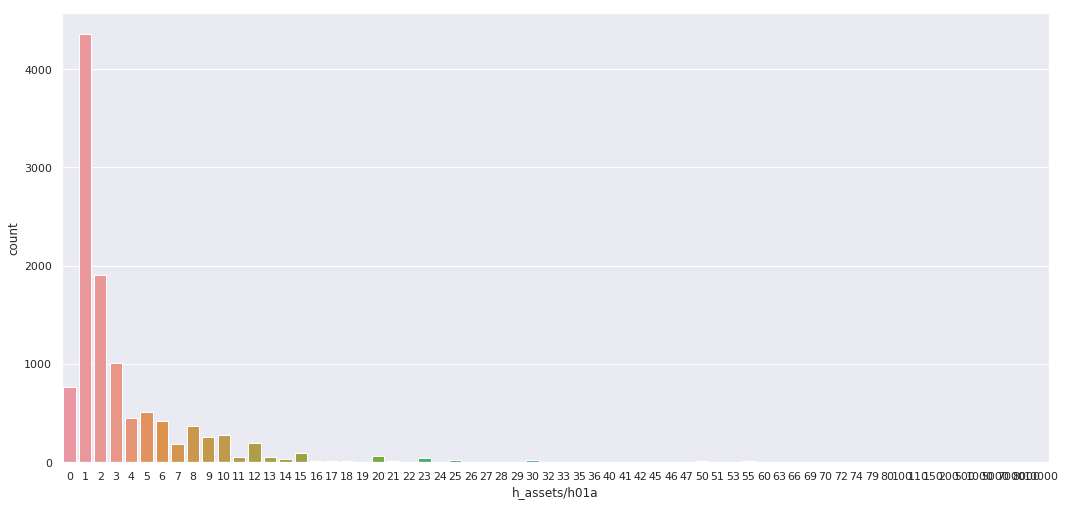

In [11]:
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(17.7,8.27)})

ax = sns.countplot(x="h_assets/h01a", data=df_assets)

**How many of these people actually own the land?**

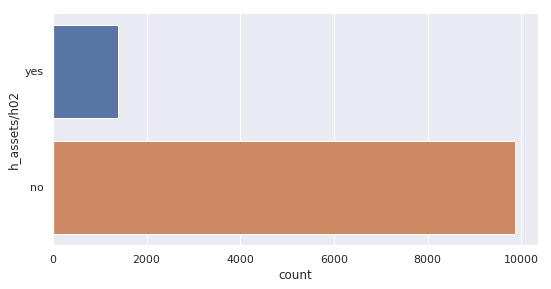

In [12]:
sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.countplot(y="h_assets/h02", data=df_assets)


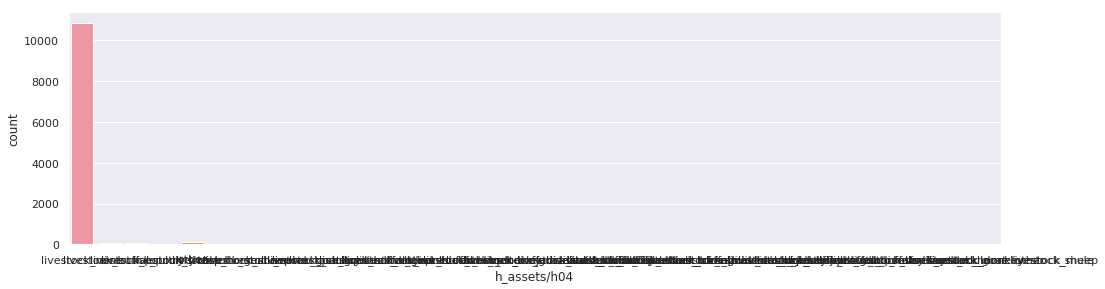

In [13]:
sns.set(rc={'figure.figsize':(16.7,4.27)})
ax = sns.countplot(x="h_assets/h04", data=df_assets)

Weirdly enough, nobody owns livestock.

In [15]:
df_assets = df_assets.rename(columns = {"h_assets/h_dai/h05": "Fridge", 
                                  "h_assets/h_dai/h06":"Stove", 
                                  "h_assets/h_dai/h07": "TV",
                                  "h_assets/h_dai/h08": "Radio",
                                  "h_assets/h_dai/h09": "VCR/DVD",
                                  "h_assets/h_dai/h10": "Mobile",
                                  "h_assets/h_dai/h11": "Computer",
                                  "h_assets/h_dai/h12": "Sewing m/c",
                                  "h_assets/h_dai/h13": "Iron",      
                                  "h_assets/h_dai/h14": "Bicycle",
                                  "h_assets/h_dai/h15": "Motorcycle",
                                  "h_assets/h_dai/h16": "Car", 
                                  "h_assets/h_dai/h17": "Tractor"
                                  }) 
melted_data = pd.melt(df_assets, value_vars=['Fridge', 'Stove', 'TV', 'Radio',
                                                 'VCR/DVD', 'Mobile', 'Computer',
                                                 'Sewing m/c', 'Iron', 'Bicycle',
                                                 'Motorcycle', 'Car', 'Tractor'], 
                      var_name='question', value_name='answer')

melted_data.groupby(by=['question', 'answer'])['answer'].count()

question    answer
Bicycle     no         7683
            yes        3577
Car         no        10124
            yes        1136
Computer    no         9679
            yes        1581
Fridge      no         5807
            yes        5453
Iron        no         3748
            yes        7512
Mobile      no         1753
            yes        9507
Motorcycle  no         8625
            yes        2635
Radio       no         8218
            yes        3042
Sewing m/c  no         5593
            yes        5667
Stove       no         4580
            yes        6680
TV          no         1775
            yes        9485
Tractor     no        11152
            yes         108
VCR/DVD     no         9867
            yes        1393
Name: answer, dtype: int64

In [25]:
df_assets = df_assets.rename(columns = {"h_assets/h18": "Are the basic kitchen items available?", 
                                  "h_assets/h19":"Do all school-aged children have the necessary basic items?", 
                                  "h_assets/h20": "Does every household member have his/her own mattrass?",
                                  "h_assets/h21": "Does every household member have his/her own blanket?",
                                  "h_assets/h22": "Do you have safe water storage containers?",
                                  "h_assets/h23": "Does the household have the necessary basic hygiene items?",
                                  
                                  }) 
melted_data1 = pd.melt(df_assets, value_vars=['Are the basic kitchen items available?',
                                             'Do all school-aged children have the necessary basic items?',
                                             'Does every household member have his/her own mattrass?',
                                             'Does every household member have his/her own blanket?',
                                             'Do you have safe water storage containers?'
                                            ], 
                      var_name='question', value_name='answer')

melted_data1.groupby(by=['question', 'answer'])['answer'].count()

question                                                     answer
Are the basic kitchen items available?                       no        2151
                                                             yes       9109
Do all school-aged children have the necessary basic items?  no        3174
                                                             yes       8086
Do you have safe water storage containers?                   no        4156
                                                             yes       7104
Does every household member have his/her own blanket?        no        3375
                                                             yes       7885
Does every household member have his/her own mattrass?       no        3426
                                                             yes       7834
Name: answer, dtype: int64

### Category 8 : Adaptive capacity


In [0]:
start_index = df.columns.get_loc("i_adaptive/i01")
end_index = df.columns.get_loc("i_adaptive/i12_other")
df_adaptive_capacity = df[df.columns[start_index: end_index]] 

In [63]:
df_adaptive_capacity.head()

,i_adaptive/i01,i_adaptive/i01income_count,i_adaptive/i04,i_adaptive/i05,i_adaptive/i05a,i_adaptive/i05a1,i_adaptive/i05a1/school_work,i_adaptive/i05a1/school_document,i_adaptive/i05a1/school_far,i_adaptive/i05a1/school_ill,i_adaptive/i05a1/school_useful,i_adaptive/i05a1/school_monet,i_adaptive/i05a1/school_language,i_adaptive/i05a1/school_allow,i_adaptive/i05a1/other,i_adaptive/i05a1_other,i_adaptive/i05b,i_adaptive/i05b1,i_adaptive/i05b1/school_work,i_adaptive/i05b1/school_document,i_adaptive/i05b1/school_far,i_adaptive/i05b1/school_ill,i_adaptive/i05b1/school_useful,i_adaptive/i05b1/school_monet,i_adaptive/i05b1/school_language,i_adaptive/i05b1/school_allow,i_adaptive/i05b1/other,i_adaptive/i05b1_other,i_adaptive/i06,i_adaptive/i07,i_adaptive/i08,i_adaptive/i09,i_adaptive/i10,i_adaptive/i11,i_adaptive/i11/vul_minor,i_adaptive/i11/vul_woman,i_adaptive/i11/vul_sing_male,i_adaptive/i11/vul_sing_female,i_adaptive/i11/vul_ill,i_adaptive/i11/vul_poor,i_adaptive/i11/vul_plw,i_adaptive/i11/vul_drugs,i_adaptive/i11/vul_old,i_adaptive/i11/vul_pdisabled,i_adaptive/i11/vul_mdisabled,i_adaptive/i11/vul_medcial,i_adaptive/i11/vul_special,i_adaptive/i11/vul_ochildren,i_adaptive/i11/other,i_adaptive/i11_other,i_adaptive/i12,i_adaptive/i12/a_food,i_adaptive/i12/a_nfi,i_adaptive/i12/a_health,i_adaptive/i12/a_housing,i_adaptive/i12/a_legal,i_adaptive/i12/other
0,2,2,8000,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expenses_half,expenses_lessh,transport_more,saving_none,debt_less,other,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3000,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expenses_mhalf,expenses_lessh,transport_nothing,saving_none,debt_less,other,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,No object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,7000,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expenses_mhalf,expenses_lessh,transport_more,saving_none,debt_more,other,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4000,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expenses_mhalf,expenses_lessh,transport_nothing,saving_none,debt_less,other,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,No option,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,3000,no,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expenses_mhalf,expenses_lessh,transport_less,saving_none,debt_less,other,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_adaptive_capacity.describe()

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of people')]

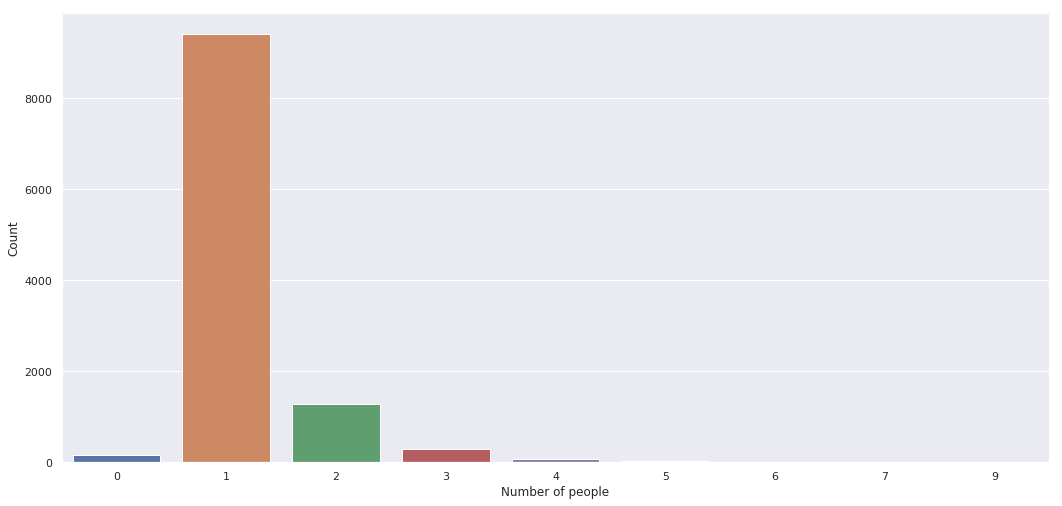

In [42]:
sns.set(style="darkgrid")

sns.set(rc={'figure.figsize':(17.7,8.27)})

ax = sns.countplot(x="i_adaptive/i01", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of people')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Average salaries')]

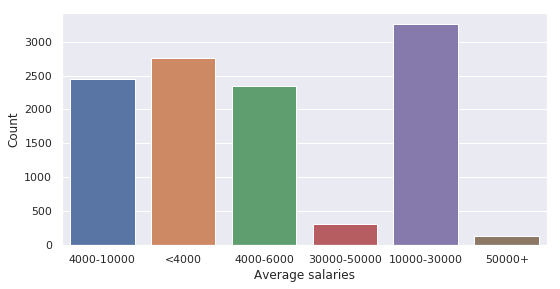

In [66]:
df_adaptive_capacity = df_adaptive_capacity.rename(columns = {"i_adaptive/i04": "Income"})

def income_group(Income):
    
    
    Income = int(Income)
    
    if Income < 4000:
        bucket = '<4000'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if Income in range(4000, 6000):
        bucket = '4000-6000'
        
    if Income in range(6000, 10000):
        bucket = '4000-10000'
        
    if Income in range(10000, 30000):
        bucket = '10000-30000'
        
    if Income in range(30000, 50000):
        bucket = '30000-50000'
    
    if Income >= 50000:
        bucket = '50000+'

    return bucket 

df_adaptive_capacity['income_group'] = df_adaptive_capacity['Income'].apply(income_group)

ax = sns.countplot(x="income_group", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Average salaries')

In [58]:
df_adaptive_capacity.describe()

,i_adaptive/i01,i_adaptive/i01income_count,i_adaptive/i04,i_adaptive/i05a,i_adaptive/i05a1/school_work,i_adaptive/i05a1/school_document,i_adaptive/i05a1/school_far,i_adaptive/i05a1/school_ill,i_adaptive/i05a1/school_useful,i_adaptive/i05a1/school_monet,i_adaptive/i05a1/school_language,i_adaptive/i05a1/school_allow,i_adaptive/i05a1/other,i_adaptive/i05b,i_adaptive/i05b1/school_work,i_adaptive/i05b1/school_document,i_adaptive/i05b1/school_far,i_adaptive/i05b1/school_ill,i_adaptive/i05b1/school_useful,i_adaptive/i05b1/school_monet,i_adaptive/i05b1/school_language,i_adaptive/i05b1/school_allow,i_adaptive/i05b1/other,i_adaptive/i12/a_food,i_adaptive/i12/a_nfi,i_adaptive/i12/a_health,i_adaptive/i12/a_housing,i_adaptive/i12/a_legal,i_adaptive/i12/other
count,11260.000000,11260.000000,11260.000000,2101.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,1991.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.00000,2929.000000
mean,1.184547,1.184547,8972.138099,0.425988,0.263724,0.060280,0.060280,0.047363,0.156082,0.353068,0.009688,0.045210,0.129171,0.669513,0.203166,0.058047,0.043536,0.031662,0.143799,0.389182,0.011873,0.059367,0.186016,0.352680,0.085012,0.290201,0.222943,0.06282,0.475930
std,0.563139,0.563139,13977.223650,0.841128,0.440889,0.238133,0.238133,0.212528,0.363128,0.478181,0.098002,0.207876,0.335570,1.180780,0.402621,0.233988,0.204194,0.175215,0.351118,0.487887,0.108388,0.236466,0.389376,0.477886,0.278947,0.453933,0.416291,0.24268,0.499506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,1.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,10000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,9.000000,9.000000,540000.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


[Text(0, 0.5, 'Are the children going to schoool?'), Text(0.5, 0, 'Count')]

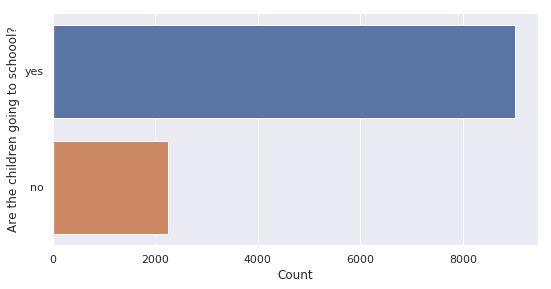

In [49]:
sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.countplot(y="i_adaptive/i05", data=df_adaptive_capacity)
ax.set(ylabel='Are the children going to schoool?', xlabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of girls attending school')]

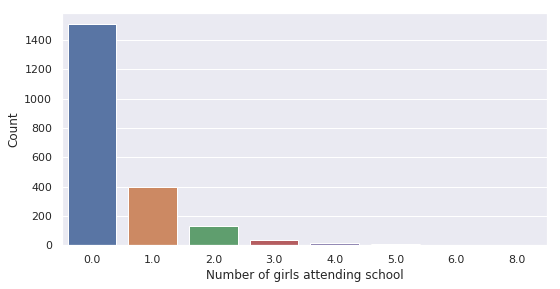

In [52]:
ax = sns.countplot(x="i_adaptive/i05a", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of girls attending school')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of boys attending school')]

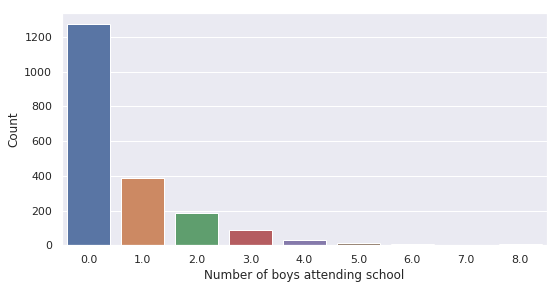

In [53]:
ax = sns.countplot(x="i_adaptive/i05b", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Number of boys attending school')

INCOME EXPENSE ON FOOD


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Order of expense')]

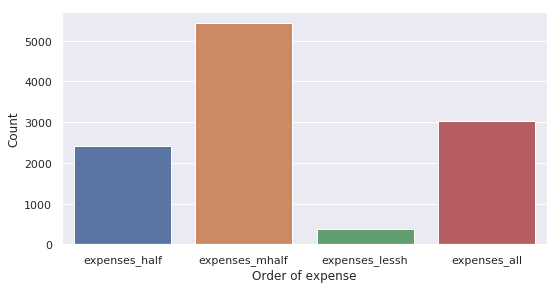

In [55]:
ax = sns.countplot(x="i_adaptive/i06", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='Order of expense')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much of your family income is spent on fuel and heating?')]

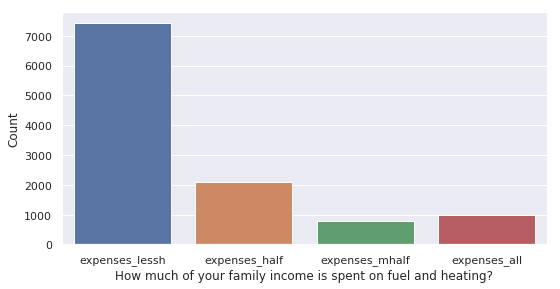

In [56]:
ax = sns.countplot(x="i_adaptive/i07", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much of your family income is spent on fuel and heating?')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much does the family spend daily to go to work?')]

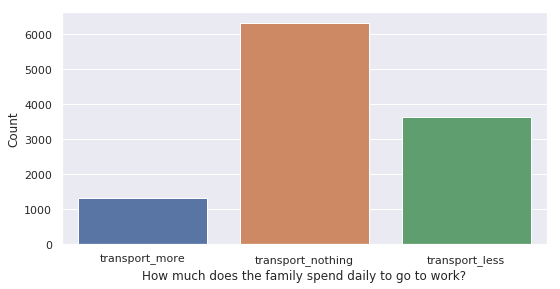

In [57]:
ax = sns.countplot(x="i_adaptive/i08", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much does the family spend daily to go to work?')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much is your family able to save per month?')]

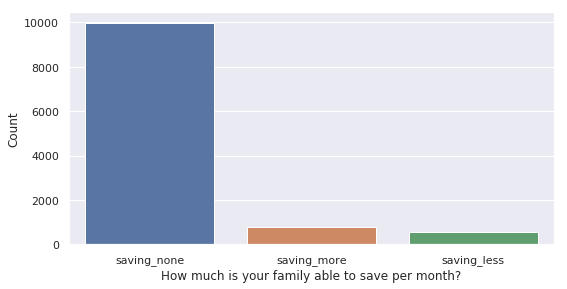

In [68]:
ax = sns.countplot(x="i_adaptive/i09", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much is your family able to save per month?')


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'How much is your families present debt in total?')]

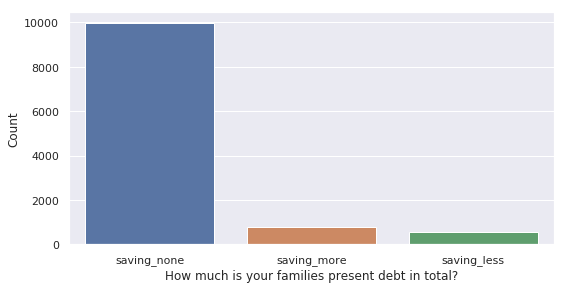

In [69]:
ax = sns.countplot(x="i_adaptive/i09", data=df_adaptive_capacity)
ax.set(ylabel='Count', xlabel='How much is your families present debt in total?')


### Category 9 : Stereotypes


In [0]:
start_index = df.columns.get_loc("j_stereotypes/j01")
end_index = df.columns.get_loc("j_stereotypes/j0/stigma_thieves")
df_stereotypes = df[df.columns[start_index: end_index]] 

In [71]:
df_stereotypes.head()

,j_stereotypes/j01,j_stereotypes/j02,j_stereotypes/j02/source_own,j_stereotypes/j02/source_fam,j_stereotypes/j02/source_neigh,j_stereotypes/j02/source_elders,j_stereotypes/j02/source_officials,j_stereotypes/j02/source_radio,j_stereotypes/j02/source_tv,j_stereotypes/j02/source_paper,j_stereotypes/j02/source_internet,j_stereotypes/j02/other,j_stereotypes/j02_other,j_stereotypes/j03,j_stereotypes/j03/source_own,j_stereotypes/j03/source_fam,j_stereotypes/j03/source_neigh,j_stereotypes/j03/source_elders,j_stereotypes/j03/source_officials,j_stereotypes/j03/source_radio,j_stereotypes/j03/source_tv,j_stereotypes/j03/source_paper,j_stereotypes/j03/source_internet,j_stereotypes/j03/other,j_stereotypes/j03_other,j_stereotypes/j0,j_stereotypes/j0/stigma_pasht,j_stereotypes/j0/stigma_taliban,j_stereotypes/j0/stigma_same
0,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0
1,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0
2,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,stigma_same,0.0,0.0,1.0
3,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0
4,idp_host,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No information,stigma_pasht,1.0,0.0,0.0


In [72]:
df_stereotypes.describe()

,j_stereotypes/j02/source_own,j_stereotypes/j02/source_fam,j_stereotypes/j02/source_neigh,j_stereotypes/j02/source_elders,j_stereotypes/j02/source_officials,j_stereotypes/j02/source_radio,j_stereotypes/j02/source_tv,j_stereotypes/j02/source_paper,j_stereotypes/j02/source_internet,j_stereotypes/j02/other,j_stereotypes/j03/source_own,j_stereotypes/j03/source_fam,j_stereotypes/j03/source_neigh,j_stereotypes/j03/source_elders,j_stereotypes/j03/source_officials,j_stereotypes/j03/source_radio,j_stereotypes/j03/source_tv,j_stereotypes/j03/source_paper,j_stereotypes/j03/source_internet,j_stereotypes/j03/other,j_stereotypes/j0/stigma_pasht,j_stereotypes/j0/stigma_taliban,j_stereotypes/j0/stigma_same
count,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,4226.000000,4226.000000,4226.000000
mean,0.127141,0.317358,0.347003,0.284750,0.106555,0.108696,0.463274,0.013505,0.005929,0.102767,0.102437,0.312747,0.332510,0.288702,0.093050,0.140810,0.545125,0.016469,0.009387,0.090415,0.407004,0.105537,0.683862
std,0.333158,0.465487,0.476056,0.451332,0.308572,0.311283,0.498690,0.115432,0.076777,0.303679,0.303248,0.463650,0.471151,0.453197,0.290527,0.347854,0.498001,0.127281,0.096440,0.286799,0.491334,0.307281,0.465023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Category 10: Interest to participate in the programme

In [0]:
start_index = df.columns.get_loc("k_interest/k01")
end_index = df.columns.get_loc("k_interest/k_participate/k05/ben_men")
df_interest = df[df.columns[start_index: end_index]] 

In [75]:
df_interest.head()

,k_interest/k01,k_interest/k_participate/k_note,k_interest/k_participate/k_label,k_interest/k_participate/k_label/ben_women,k_interest/k_participate/k_label/ben_men,k_interest/k_participate/k02,k_interest/k_participate/k02/ben_women,k_interest/k_participate/k02/ben_men,k_interest/k_participate/k03,k_interest/k_participate/k03/ben_women,k_interest/k_participate/k03/ben_men,k_interest/k_participate/k04,k_interest/k_participate/k04/ben_women,k_interest/k_participate/k04/ben_men,k_interest/k_participate/k05,k_interest/k_participate/k05/ben_women
0,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_men,0.0
1,yes,NaN,NaN,NaN,NaN,ben_women,1.0,0.0,NaN,NaN,NaN,ben_women,1.0,0.0,ben_women,1.0
2,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0
3,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0
4,yes,NaN,NaN,NaN,NaN,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0,1.0,ben_women ben_men,1.0


In [76]:
ax = sns.countplot(x="k_interest/k_participate/k02", hue="who", data=df_interest)

ValueError: ignored

# Part 2: Deep dive in each category 

## I. Basic and Household Composition information

In [0]:
df_basics_hh.head()

,a_basics/a01,a_basics/a02,a_basics/a03,a_basics/a03_other,b_hh/b01a,b_hh/b01b,b02a,b02b,b03a,/b03b,...,b06a,b06b,hh_male,hh_female,hh_total,hh_eligbilefem,hh_girls,hh_boys,hh_lit_female,hh_lit_male
0,male,married living with spouse,tajik,NaN,0,0,0,0,1,2,...,2.0,3,4,3,7,3,1,2,3,4
1,female,married living with spouse,hazara,NaN,0,0,0,0,0,0,...,2.0,0,2,3,5,3,0,0,3,2
2,female,married living with spouse,pashtun,NaN,0,0,0,0,0,4,...,3.0,5,10,7,17,7,0,4,7,10
3,female,widow,tajik,NaN,0,0,0,0,0,0,...,2.0,1,4,5,9,4,0,0,5,4
4,female,married living with spouse,tajik,NaN,0,0,0,1,2,0,...,4.0,2,4,4,8,4,2,1,4,3


In [0]:
x = np.linspace(0, np.pi, 300)

layout = go.Layout(
    title='<b>Distribution of Age</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(Age range)</i>'
    ),
    
    barmode='stack'
)


f1 = df_basics_hh['b_hh/b01a'].sum()
f2 = df_basics_hh['b02a'].sum()
f3 = df_basics_hh['b03a'].sum()
f4 = df_basics_hh['b04a'].sum()
f5 = df_basics_hh['b05a'].sum()

m1 = df_basics_hh['b_hh/b01b'].sum()
m2 = df_basics_hh['b02b'].sum()
m3 = df_basics_hh['/b03b'].sum()
m4 = df_basics_hh['b04b'].sum()
m5 = df_basics_hh['b05b'].sum()


trace1 = go.Bar(
    x=['0-4', '5-11', '12-17', '18-59', '60+'],
    y=[f1, f2, f3, f4, f5],
    name='females'
)
trace2 = go.Bar(
    x=['0-4', '5-11', '12-17', '18-59', '60+'],
    y=[m1, m2, m3, m4, m5],
    name='males'
)

data = [trace1, trace2]
layout = layout

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [0]:
x = np.linspace(0, np.pi, 300)

layout = go.Layout(
    title='<b>Distribution of Household Size</b>',
    yaxis=dict(
        title='<i>(Count)</i>'
    ),
    xaxis=dict(
        title='<i>(Household Size)</i>'
    )
)

data = [go.Histogram(x = df_basics_hh['hh_total'])]
layout = layout
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='hist')

In [0]:
p1 = (df_basics_hh['hh_lit_female'].sum()*100)/df_basics_hh['hh_female'].sum() # female literate
p2 = (df_basics_hh['hh_lit_male'].sum()*100)/df_basics_hh['hh_male'].sum() # male literate

p11 = 100 - p1
p22 = 100 - p2 


fig = {
  "data": [
    {
      "values": [p1, p11],
      "labels": [
        "literate",
        "liliterate"
      ],
      "domain": {"column": 0},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [p2, p22],
      "labels": [
        "literate",
        "liliterate"
      ],
      "textposition":"inside",
      "domain": {"column": 1},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentage of Illiterates vs Literates",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "males",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "females",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.offline.iplot(fig, filename='donut')